In [1]:
import pandas as pd
import numpy as np
from causallearn.search.ConstraintBased.FCI import fci
from causallearn.utils.cit import rcit
import networkx as nx
import matplotlib.pyplot as plt
from causallearn.utils.GraphUtils import GraphUtils

In [2]:
df = pd.read_csv("encoded_clean_data3.csv")

df = df.iloc[:, 1:-17]
df = df.apply(pd.to_numeric, errors="coerce")
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df = df.apply(lambda col: col.fillna(col.mean()), axis=0)
df = df.dropna(axis=1, how="all")
df = df.dropna(axis=0, how="any")

group1 = df[(df['age'] >= 18) & (df['age'] <= 44)]
group2 = df[(df['age'] >= 45) & (df['age'] <= 64)]
group3 = df[(df['age'] >= 65) & (df['age'] <= 100)]

target_size = len(group1)
group2 = group2.sample(n=target_size, random_state=42)
group3 = group3.sample(n=target_size, random_state=42)

In [11]:
features = [
    "physical_status", "Length", "LACE", "Comorbidity", "BUN",
    "NIBP_MAP", "E_origin", "WBC", "HR", "admission_location", "insurance",
    "NIBP_DIA", "Acuity", "Hgb", "NIBP_SYS", "Glucose", "SpO2", "readmitted"
]

df1 = group3[features]

data1 = df1.to_numpy()
var_names1 = df1.columns.tolist()

In [12]:
pag, sep_set = fci(data1, independence_test_method=rcit, alpha=0.01, max_k=3, verbose=False)

  0%|          | 0/18 [00:00<?, ?it/s]

X18 --> X1
X4 --> X3
X16 --> X4
X12 --> X6
X18 --> X9


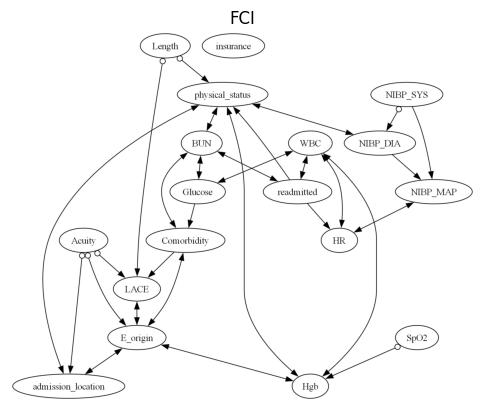

In [13]:
pydot_graph = GraphUtils.to_pydot(pag, labels=var_names1)
pydot_graph.write_png("figures/fci1_age3.png") 

img = plt.imread("figures/fci1_age3.png")
plt.imshow(img)
plt.axis('off')
plt.title("FCI")
plt.show()

In [27]:
features2 = [
    "physical_status", "Length", "LACE", "Comorbidity", "BUN",
    "NIBP_MAP", "E_origin", "WBC", "readmitted"
]

df2 = group3[features2]

data2 = df2.to_numpy()
var_names2 = df2.columns.tolist()

In [28]:
pag2, sep_set2 = fci(data2, independence_test_method=rcit, alpha=0.01, max_k=3, verbose=False)

  0%|          | 0/9 [00:00<?, ?it/s]

X2 --> X1
X1 --> X8
X9 --> X2
X5 --> X4


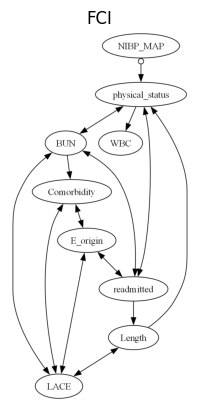

In [30]:
pydot_graph = GraphUtils.to_pydot(pag2, labels=var_names2)
pydot_graph.write_png("figures/fci2_age3.png") 

img = plt.imread("figures/fci2_age3.png")
plt.imshow(img)
plt.axis('off')
plt.title("FCI")
plt.show()

In [ ]:
features3 = [
    "physical_status", "Length", "LACE", "Comorbidity", "readmitted"
]

df3 = group3[features3]

data3 = df3.to_numpy()
var_names3 = df3.columns.tolist()

In [38]:
pag3, sep_set3 = fci(data3, independence_test_method=rcit, alpha=0.05, max_k=3, verbose=False)

  0%|          | 0/5 [00:00<?, ?it/s]

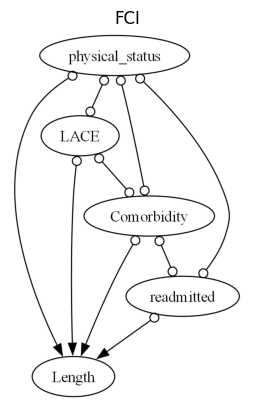

In [39]:
pydot_graph = GraphUtils.to_pydot(pag3, labels=var_names3)
pydot_graph.write_png("figures/fci3_age3.png") 

img = plt.imread("figures/fci3_age3.png")
plt.imshow(img)
plt.axis('off')
plt.title("FCI")
plt.show()

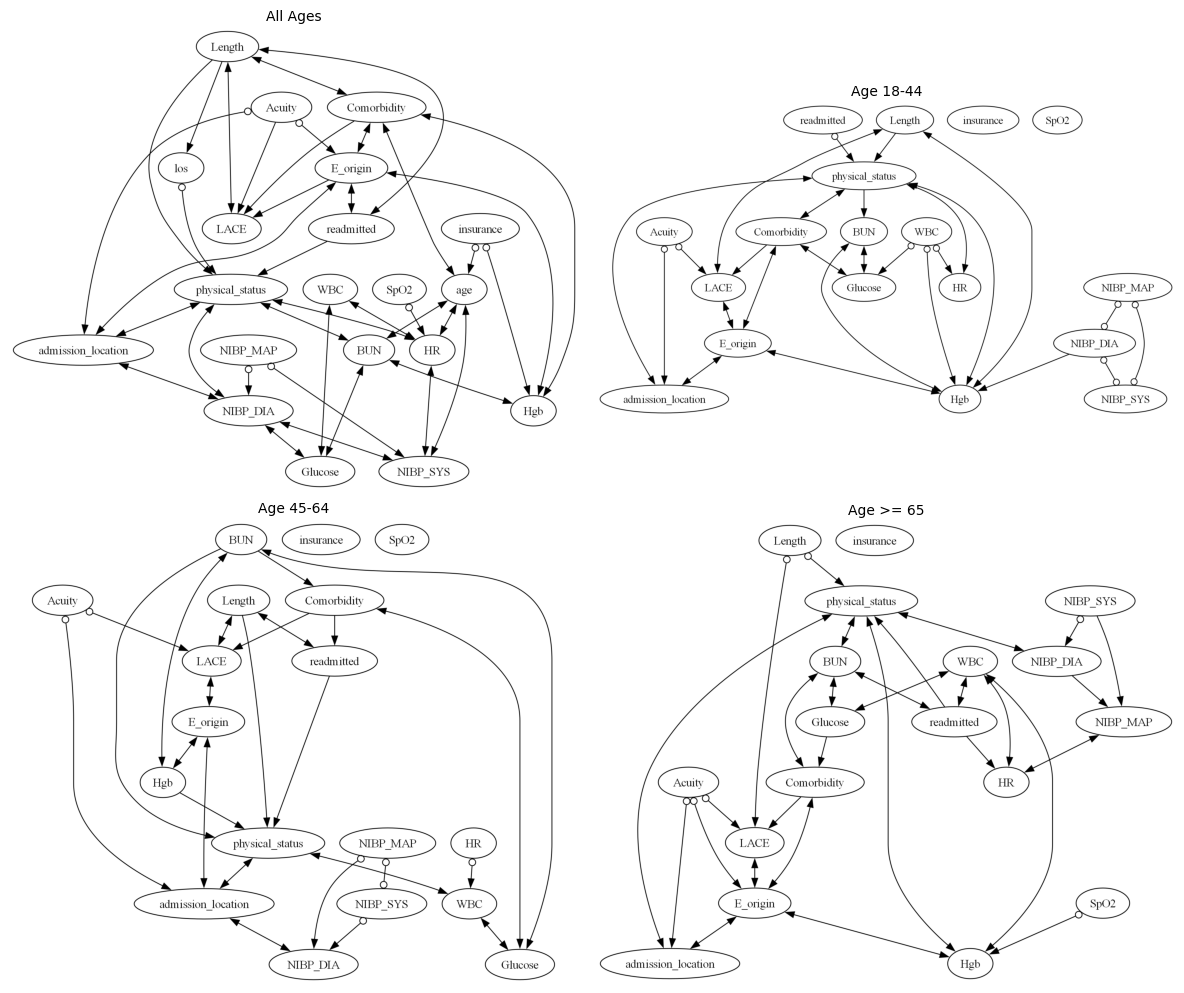

In [41]:
image_paths = [
    "figures/fci_result.png",
    "figures/fci1_age1.png",
    "figures/fci1_age2.png",
    "figures/fci1_age3.png"
]

titles = ["All Ages", "Age 18-44", "Age 45-64", "Age >= 65"]

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

for i, ax in enumerate(axs.flat):
    img = plt.imread(image_paths[i])
    ax.imshow(img)
    ax.set_title(titles[i], fontsize=10)
    ax.axis('off')

plt.tight_layout()
plt.show()

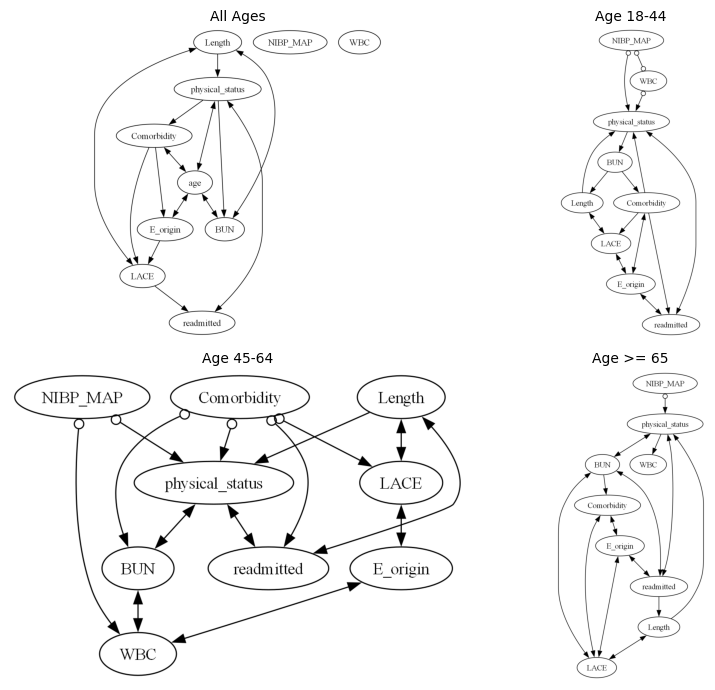

In [46]:
image_paths = [
    "figures/fci_result2.png",
    "figures/fci2_age1.png",
    "figures/fci2_age2.png",
    "figures/fci2_age3.png"
]

titles = ["All Ages", "Age 18-44", "Age 45-64", "Age >= 65"]

fig, axs = plt.subplots(2, 2, figsize=(9, 7))

for i, ax in enumerate(axs.flat):
    img = plt.imread(image_paths[i])
    ax.imshow(img)
    ax.set_title(titles[i], fontsize=10)
    ax.axis('off')

plt.tight_layout()
plt.show()

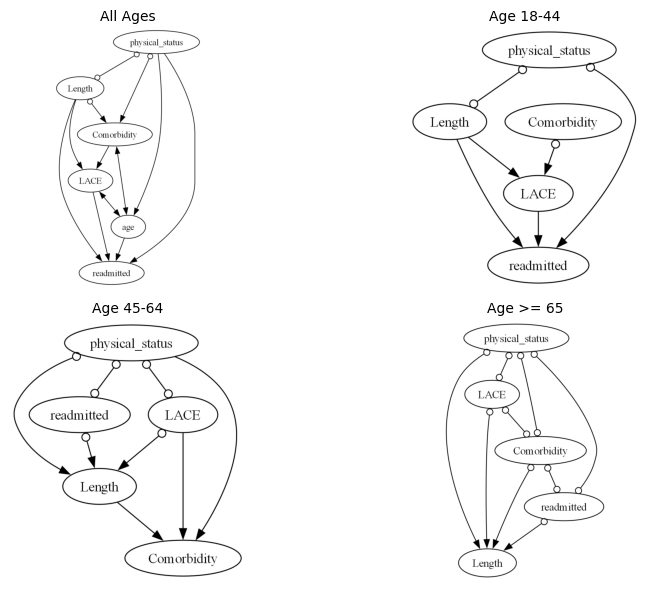

In [48]:
image_paths = [
    "figures/fci_result3.png",
    "figures/fci3_age1.png",
    "figures/fci3_age2.png",
    "figures/fci3_age3.png"
]

titles = ["All Ages", "Age 18-44", "Age 45-64", "Age >= 65"]

fig, axs = plt.subplots(2, 2, figsize=(10, 6))

for i, ax in enumerate(axs.flat):
    img = plt.imread(image_paths[i])
    ax.imshow(img)
    ax.set_title(titles[i], fontsize=10)
    ax.axis('off')

plt.tight_layout()
plt.show()